In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Salary.csv')
df

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1
...,...,...,...,...
95,18.6,1,26,0
96,152.0,1,56,1
97,1.8,1,28,0
98,35.0,0,44,0


In [3]:
df.head()

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


In [4]:
df.tail()

,Salary,Gender,Age,PhD
95,18.6,1,26,0
96,152.0,1,56,1
97,1.8,1,28,0
98,35.0,0,44,0
99,4.0,0,24,0


In [5]:
df.columns

Index(['Salary', 'Gender', 'Age', 'PhD'], dtype='object')

In [6]:
df.dtypes

,0
Salary,float64
Gender,int64
Age,int64
PhD,int64


In [7]:
df.isna().sum()

,0
Salary,0
Gender,0
Age,0
PhD,0


In [10]:
x=df.iloc[:,1:]
y=df.iloc[:,0]
x

,Gender,Age,PhD
0,1,47,1
1,0,65,1
2,0,56,0
3,1,23,0
4,0,53,1
...,...,...,...
95,1,26,0
96,1,56,1
97,1,28,0
98,0,44,0


In [11]:
y

,Salary
0,140.0
1,30.0
2,35.1
3,30.0
4,80.0
...,...
95,18.6
96,152.0
97,1.8
98,35.0


<Axes: xlabel='Age', ylabel='Salary'>

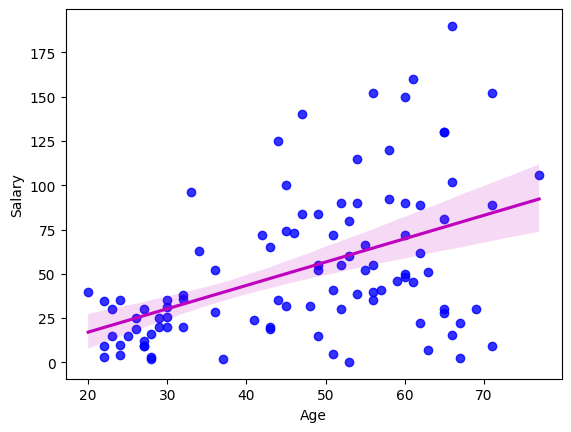

In [13]:
import seaborn as snc
snc.regplot(x=df['Age'],y=y,color='blue',line_kws={'color':'m'})

<Axes: xlabel='Gender', ylabel='Salary'>

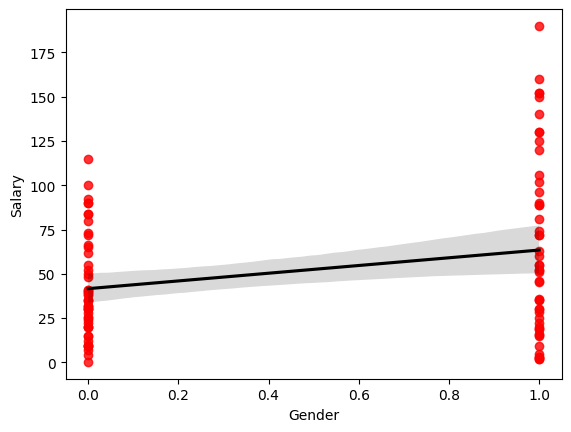

In [14]:
snc.regplot(x=df['Gender'],y=y,color='r',line_kws={'color':'k'})

<Axes: xlabel='PhD', ylabel='Salary'>

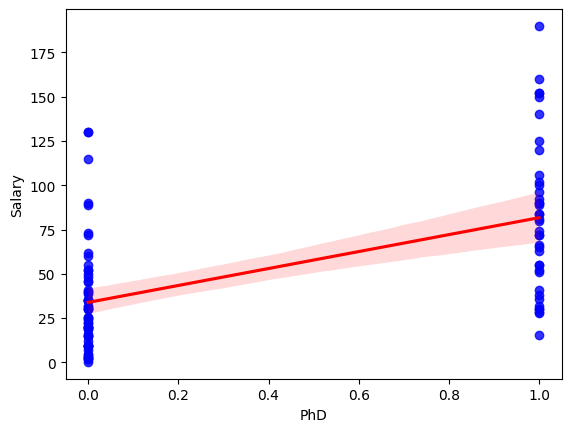

In [19]:
snc.regplot(x=df['PhD'],y=y,color='b',line_kws={'color':'r'}) # if the graph is like this then it means that the columns are not important

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([62.74478203, 15.57204442, 44.42592486, 62.2650529 , 19.69402734,
       53.67641961, 46.89911461, 56.67640914, 22.34934942, 68.21796132,
       83.88149641, 59.79186315, 88.00347933, 28.94452209, 88.00347933,
       66.38703582, 86.35468616, 77.28632374, 78.93511691, 65.56263924,
       39.66167768, 55.32521278, 59.14959889, 92.94985883, 32.88437268,
       18.04523418, 27.29572893, 75.63753057, 81.40830666, 41.12833852])

In [23]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
83,9.00,62.744782,-53.744782
53,34.80,15.572044,19.227956
70,40.70,44.425925,-3.725925
45,32.00,62.265053,-30.265053
44,9.00,19.694027,-10.694027
39,72.00,53.676420,18.323580
22,50.00,46.899115,3.100885
80,96.00,56.676409,39.323591
10,3.00,22.349349,-19.349349
0,140.00,68.217961,71.782039


In [24]:
print(list(zip(x,model.coef_)))

[('Gender', 6.777304999670192), ('Age', 0.8243965838443668), ('PhD', 25.25869729651123)]


In [25]:
print('y intercept = ',model.intercept_)

y intercept =  -2.5646804204945823


In [26]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score

In [27]:
print('MAE = ',mean_absolute_error(y_test,y_pred))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MSE = ',mean_squared_error(y_test,y_pred))
print('RMSE = ',root_mean_squared_error(y_test,y_pred))
print('R2_Score = ',r2_score(y_test,y_pred))

MAE =  32.26355243240472
MAPE =  6.332546821323257
MSE =  1698.6520842143498
RMSE =  41.21470713488511
R2_Score =  0.38011988131788244
